In [41]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

tickers=['INFY','^NSEI']
data=pd.DataFrame()

for a in tickers:
    data[a]=yf.download(a,start='2015-1-1')['Close']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# MONTE CARLO allows us to forecast - revenues, cogs, opex

In [28]:
#Drift = dir rate of returns have been headed in the past
#calculate avg, stddev and var of daily returns 
#d= (avg daily return - 0.5 * var)

In [32]:
#Volatility (random variable)
# V= (historical volatility) * Z(Rand(0;1))

In [34]:
# price today = price yesterday * e^(d+v)

In [45]:
ticker=['INFY']
data=pd.DataFrame()
data[ticker]=yf.download(ticker, start='2015-1-1')['Close']

[*********************100%***********************]  1 of 1 completed


In [47]:
log_returns = np.log(1 + data.pct_change())

In [49]:
log_returns.tail()

,INFY
Date,
2024-12-27,-0.007092
2024-12-30,-0.017048
2024-12-31,-0.008178
2025-01-02,0.031435
2025-01-03,0.001105


In [51]:
u= log_returns.mean()
u

INFY    0.00052
dtype: float64

In [53]:
var = log_returns.var()
var

INFY    0.000303
dtype: float64

In [55]:
d=u-0.5*var
d

INFY    0.000368
dtype: float64

In [59]:
stdev = log_returns.std()
stdev

INFY    0.017405
dtype: float64

In [61]:
norm.ppf(0.95)

1.644853626951472

In [97]:
x=np.random.rand(10,2)
x

array([[0.86252779, 0.87429791],
       [0.22551656, 0.08766084],
       [0.44488019, 0.84475077],
       [0.42809987, 0.06130883],
       [0.16693231, 0.47898122],
       [0.3707683 , 0.9560486 ],
       [0.07649276, 0.86908852],
       [0.90267741, 0.01582994],
       [0.80177955, 0.96098657],
       [0.77145806, 0.27955495]])

In [99]:
norm.ppf(x)

array([[ 1.09174677,  1.14694544],
       [-0.75369378, -1.35530099],
       [-0.13860741,  1.01417667],
       [-0.18121384, -1.54387895],
       [-0.96635892, -0.05271068],
       [-0.32981916,  1.70656575],
       [-1.4290651 ,  1.12209285],
       [ 1.29695933, -2.14867877],
       [ 0.84799474,  1.76225123],
       [ 0.74365722, -0.58416412]])

In [67]:
z=norm.ppf(np.random.rand(10,2))
z

array([[ 0.42374761,  0.34259712],
       [-1.49360682,  0.78463239],
       [-0.52228488, -0.57348737],
       [-0.4610698 ,  1.22228393],
       [-0.89165386, -0.55087427],
       [-0.65335842, -0.83955446],
       [ 1.50567463, -0.09008512],
       [-0.2289563 ,  0.42953392],
       [ 0.80014279,  1.75268654],
       [-0.53401892,  0.59975729]])

In [69]:
t_intervals = 1000
iterations = 10

In [105]:
daily_returns = np.exp(d.values+stdev.values*norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99692756, 0.96933191, 0.99848509, ..., 0.96695998, 1.00027376,
        1.02405894],
       [1.00332652, 1.01031585, 1.01914989, ..., 1.02178328, 1.00260764,
        0.99483327],
       [0.99994508, 1.02036149, 1.00656386, ..., 1.00706645, 1.03129115,
        1.01242444],
       ...,
       [1.0319585 , 1.04038797, 0.94938222, ..., 1.00422488, 1.00107737,
        1.03013963],
       [0.98646725, 0.99359813, 0.9771328 , ..., 0.97704423, 0.98423295,
        1.00274225],
       [0.99726866, 0.98803979, 0.96930528, ..., 1.01383845, 1.01123359,
        0.99137258]])

In [106]:
# S(t+1) = S(t) * daily_return(t+1)
# S1 = S0 * daily_return(1)

In [107]:
S0 = data.iloc[-1]
S0

INFY    22.645
Name: 2025-01-03 00:00:00, dtype: float64

In [108]:
price_list = np.zeros_like(daily_returns)

In [109]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [110]:
price_list[0] = S0

In [111]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [112]:
price_list

array([[22.64500046, 22.64500046, 22.64500046, ..., 22.64500046,
        22.64500046, 22.64500046],
       [22.72032951, 22.87860296, 23.07864976, ..., 23.13828295,
        22.70405055, 22.52799978],
       [22.71908178, 23.34444547, 23.2301347 , ..., 23.3017884 ,
        23.41448641, 22.80789753],
       ...,
       [40.16743784, 46.42983839,  4.29921419, ..., 40.62303572,
        22.74668997, 38.674667  ],
       [39.62386189, 46.13260078,  4.20090319, ..., 39.69050254,
        22.38804182, 38.78072274],
       [39.51563571, 45.58084499,  4.07195765, ..., 40.2397575 ,
        22.63953987, 38.44614498]])

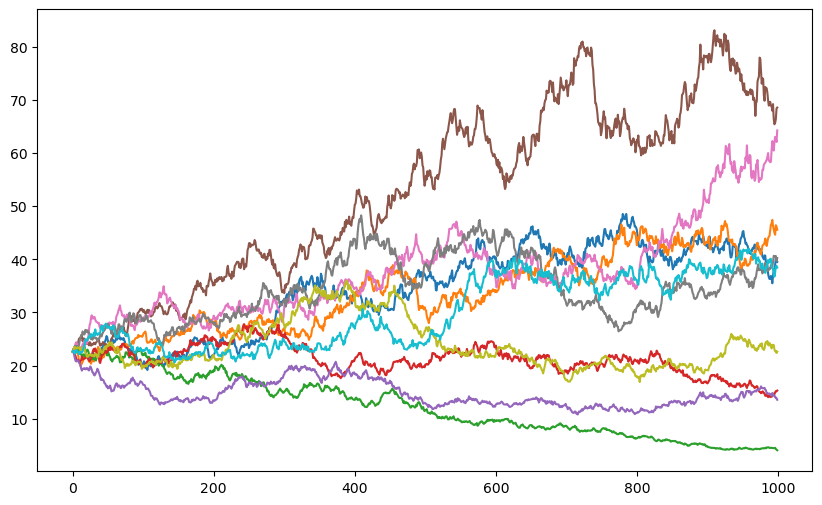

In [113]:
plt.figure(figsize=(10,6))
plt.plot(price_list);